[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/scottlevie97/python_FVM_CSM/blob/newBoundaryConditions/seperate_notebooks/_01_Defining_Mesh.ipynb)

# 1. **Introduction**
***

Welcome to this set of jupyter notebooks that outline how to build a finite volume solid mechanics solver. The notebooks contains descriptions of each stage of creating the code. 

The solver produced from these notebooks is the following:

- Uses the **finite volume method**
- Uses a **structured mesh** with rectangular geometry
- Assumes a **linear elastic** solid model
- Boundary conditions may be **fixed displacement** or **fixed traction**.

# Defining Geometry

The geometry of the spatial domain for this solver will be rectangular with an x-dimension length of $L_x$ metres and a y-dimension length of $L_y$ metres. 

<img src="./Paper_Images/mesh_geometry.png"  style="width: 400px;"/>

In [2]:
# Assigning example values to these parameters:

Lx = 1  # Width of domain
Ly = 1  # Height of domain

# Defining Mesh


The spatial domain will be split into cells. Each cell will represent a volume of space where its behaviour will be described by a set of governing equations. The solver will compute what will happen at each cell. Each computational cell is rectangular with x-dimensions of $dx$ metres y-dimensions of $dy$ metres. This is what is meant by a structured mesh. 

The number of cells in the x-direction = $n_x$

The number of cells in the y-direction = $n_y$

<img src="./Paper_Images/Mesh.jpg" alt="Drawing" style="width: 400px;"/>


<!-- This solver will be for a structured mesh. The size of the cells within the mesh will remain constant with time.  -->

In [3]:
nx = 4  # Number of cells in the x-direction
ny = 4  # Number of cells in the y-direction

dy = Ly/ny  # Length of each control volume in the y-direction
dx = Lx/nx  # Length of each control volume in the x-direction


# Indexing Convention

Next we'll determine an indexing convention that will assign an ID number to each cell centre within the mesh.

<img src="./Paper_Images/mesh_cells.png" alt="Drawing" style="width: 400px;"/>


The index notation will start at the bottom left of the mesh and increase across the rows of equal x displacement.

The following function visualises the mesh and the node IDs. Feel free to play around with Lx, Ly, nx and ny values:


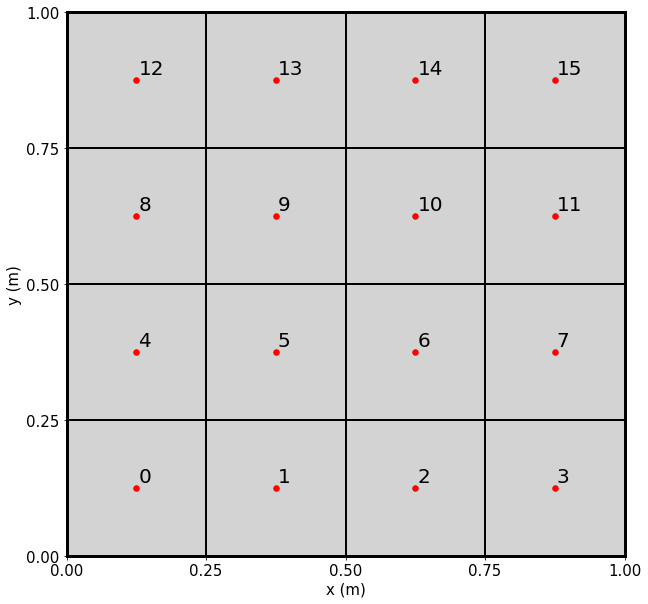

In [4]:
from ipynb.fs.full.Background_Functions import visualise_mesh

visualise_mesh(Lx, Ly, nx, ny)

Feel free to play around with this function for different mesh sizes. 

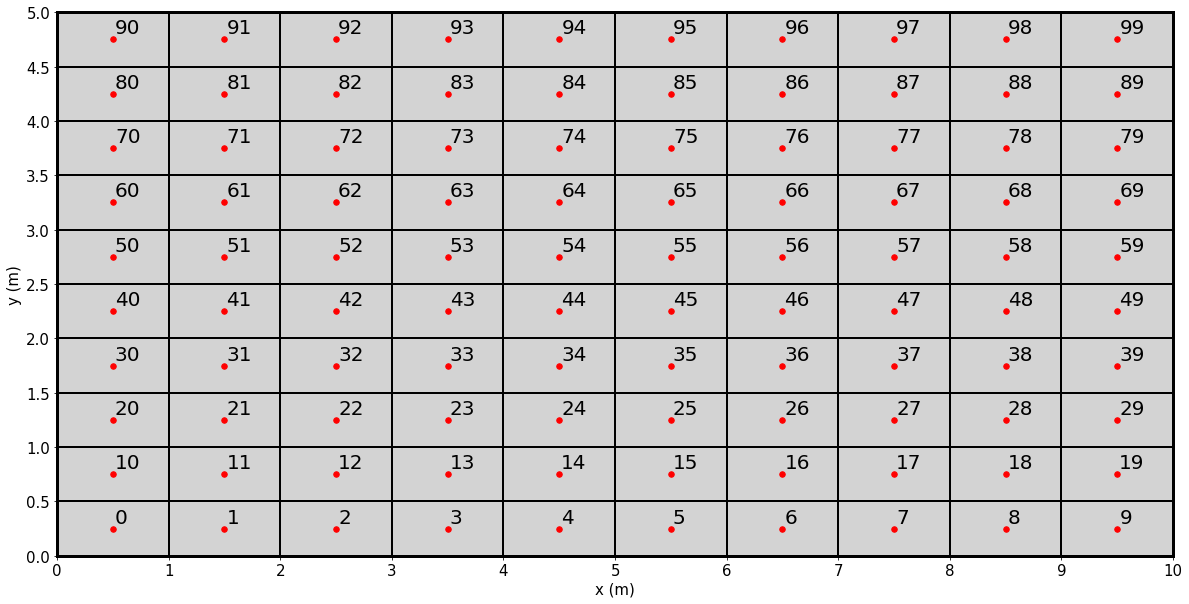

In [12]:
# Example with different values

Lx, Ly, nx, ny = 10, 5, 10, 10
visualise_mesh(Lx, Ly, nx, ny)

# Displacement Fields


Each cell on the above mesh is a point in the displacement field $\boldsymbol{u} (x,y)$. The $\boldsymbol{u}$ field can be thought as the change in displacement from it's original position, not the distance from the origin. Therefore we can initialise the $\boldsymbol{u}$ field to be equal to zero for all points in all directions.

As our mesh is 2D the $\boldsymbol{u} (x,y)$ (<code>U</code>) field is made up of change of displacement in the x-direction $u$ (<code>u</code>) and in the y-direction $v$ (<code>v</code>).


In [16]:
import numpy as np

# Initialise U field:
def initalise_U_field(nx, ny):

    # Create an zero array for the u and v values for each point
    U = np.zeros([nx*ny, 2])

    return U

U = initalise_U_field(4, 4)

In [19]:
# The shape of U:

print("Shape of U: " + str(U.shape))

# This value is the number of nodes in the mesh
print("Number of nodes in Mesh: " + str(U.shape[0]))

# This is the number of dimension, i.e x & y
print("Number of dimensions: " + str(U.shape[1]))

# Print the U field
print("U field: \n" + str(U))


Shape of U: (16, 2)
Number of nodes in Mesh: 16
Number of dimensions: 2
U field: 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


So what is this above array? This represents the displacement at each cell; the index of the array represents the displacement of the cell at the same index.

i.e. the displacement at cell $i$ can be accessed as follows: <code>U[i]</code>

In [23]:
# Random value for i 
i = 5

print("U[i]: " + str(U[i])) 

U[i]: [0. 0.]


### Note on changing displacement:

*This need re-wording/ in wrong location*

This solver will be used to solve for a displacement field of a solution due to conditions external conditions. One assumption for this solver is that the new displacement field has little effect on the size and orientation of the cells within the mesh, i.e., even though we are solving for new displacements, we assume that these displacements are so small that the effect they would have on creating a new mesh geometry are minute. 